TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load the dataset
df2 = pd.read_csv("car data.csv")

In [3]:
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Step 3: Preprocessing
df2 = df2.copy()
df2['Car_Age'] = 2025 - df2['Year']  # Convert Year to Age
df2.drop(['Year', 'Car_Name'], axis=1, inplace=True)  # Drop unused columns

In [5]:
# Encode categorical columns
le = LabelEncoder()
df2['Fuel_Type'] = le.fit_transform(df2['Fuel_Type'])
df2['Selling_type'] = le.fit_transform(df2['Selling_type'])
df2['Transmission'] = le.fit_transform(df2['Transmission'])

In [6]:
# Confirm processed dataset
df2.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8
3,2.85,4.15,5200,2,0,1,0,14
4,4.60,6.87,42450,1,0,1,0,11


In [7]:
# Step 4: Define features and target
X = df2.drop('Selling_Price', axis=1)
y = df2['Selling_Price']

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 5: Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Predict
y_pred = model.predict(X_test)

In [11]:
# Step 6: Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9592683769360726
RMSE: 0.9686468632776881


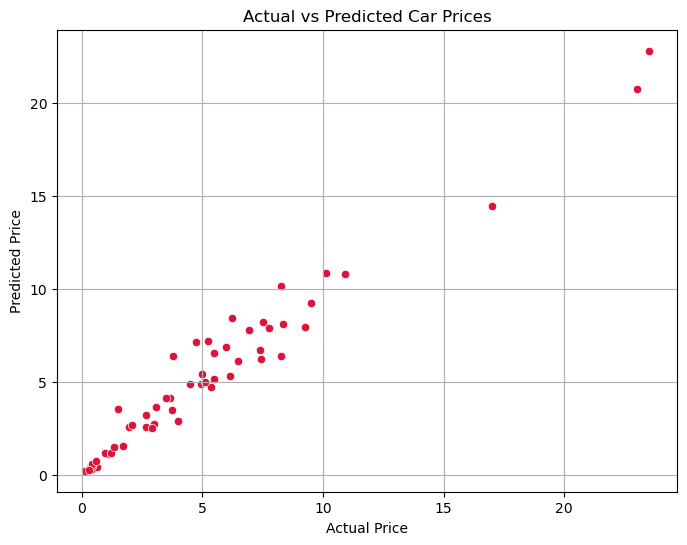

In [12]:
# Step 7: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='crimson')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()